In [1]:
library(glmnet)
library(ggplot2)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



In [2]:
options(stringsAsFactors = FALSE)

In [3]:
base_dir <- "/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/feature_selection/"

In [4]:
load(paste0(base_dir, "early.RData"))

In [5]:
length(bootstraps)

[1] 1000

In [6]:
lambda_sequence <- bootstraps[[1]][["lambda"]]
genes <- rownames(coef(bootstraps[[1]], s = lambda_sequence[1]))

In [7]:
head(genes)

[1] "(Intercept)"  "TTN_HUMAN"    "AATF_HUMAN"   "NEXN_HUMAN"   "SOD2_HUMAN"  
[6] "MALAT1_HUMAN"

In [8]:
head(lambda_sequence)

[1] 0.5630120 0.5350366 0.5084513 0.4831870 0.4591781 0.4363621

In [9]:
genes <- genes[2:length(genes)]

In [10]:
head(genes)
length(genes)
num_genes <- length(genes)

[1] "TTN_HUMAN"    "AATF_HUMAN"   "NEXN_HUMAN"   "SOD2_HUMAN"   "MALAT1_HUMAN"
[6] "PIGP_HUMAN"

[1] 22187

In [11]:
nonzero_gene_count <- c()
lambda <- min(lambda_sequence)

genes_coeff <- coef(bootstraps[[1]], s = lambda)
genes_coeff <- genes_coeff[2:length(genes_coeff),]
gene_names <- names(genes_coeff)
genes_nonzero <- gene_names[abs(genes_coeff) > 0]
nonzero_gene_count <- c(nonzero_gene_count, length(genes_nonzero))

genes_intersect <- genes_nonzero

for (i in 2:length(bootstraps)) {
    lambda_seq <- bootstraps[[i]][["lambda"]]
    if (lambda < tail(lambda_seq, n = 1)) {
        print(i)
    } 
    genes_coeff <- coef(bootstraps[[i]], s = lambda)
    genes_coeff <- genes_coeff[2:length(genes_coeff),]
    gene_names <- names(genes_coeff)
    genes_nonzero <- gene_names[abs(genes_coeff) > 0]
    nonzero_gene_count <- c(nonzero_gene_count, length(genes_nonzero))
    genes_intersect <- intersect(genes_intersect, genes_nonzero)
}

### Non-zero genes in all rounds

In [12]:
print(length(genes_intersect))
genes_intersect

[1] 61


[1] "TTN_HUMAN"       "NLGN1_HUMAN"     "FAM155A_HUMAN"   "CCDC141_HUMAN"  
 [5] "KCNIP4_HUMAN"    "SORCS1_HUMAN"    "HS3ST4_HUMAN"    "GRIN2A_HUMAN"   
 [9] "PTCHD4_HUMAN"    "UACA_HUMAN"      "PRTG_HUMAN"      "CNTN5_HUMAN"    
[13] "GPRIN3_HUMAN"    "PEG10_HUMAN"     "ANGPT1_HUMAN"    "CDH11_HUMAN"    
[17] "SYT1_HUMAN"      "FN1_HUMAN"       "TENM3_HUMAN"     "PLEKHA5_HUMAN"  
[21] "LDLRAD4_HUMAN"   "TENM4_HUMAN"     "RBMS3_HUMAN"     "LRP1B_HUMAN"    
[25] "PPFIA2_HUMAN"    "LAMA4_HUMAN"     "LSAMP_HUMAN"     "SPHKAP_HUMAN"   
[29] "MYH7_HUMAN"      "EGFEM1P_HUMAN"   "PIP5K1B_HUMAN"   "DLEU1_HUMAN"    
[33] "PDGFD_HUMAN"     "RNF150_HUMAN"    "HS6ST3_HUMAN"    "COL11A1_HUMAN"  
[37] "RELN_HUMAN"      "HMGA2_HUMAN"     "L3MBTL4_HUMAN"   "LDHA_HUMAN"     
[41] "UNC5C_HUMAN"     "NREP_HUMAN"      "CASC9_HUMAN"     "DTNA_HUMAN"     
[45] "ANKRD44_HUMAN"   "HSPG2_HUMAN"     "ETV1_HUMAN"      "NR2F2-AS1_HUMAN"
[49] "SYNPO2_HUMAN"    "PLCXD3_HUMAN"    "RPS6_HUMAN"      "SMARCA2_HUMAN"  
[53] "CKM_HUMAN"       "GRIA4_HUMAN"     "PRSS35_HUMAN"    "SLC44A5_HUMAN"  
[57] "NLGN4X_HUMAN"    "XDH_HUMAN"       "PRRX1_HUMAN"     "PDZD2_HUMAN"    
[61] "RNU4-2_HUMAN"

### Distribution of non-zero genes at min lambda

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


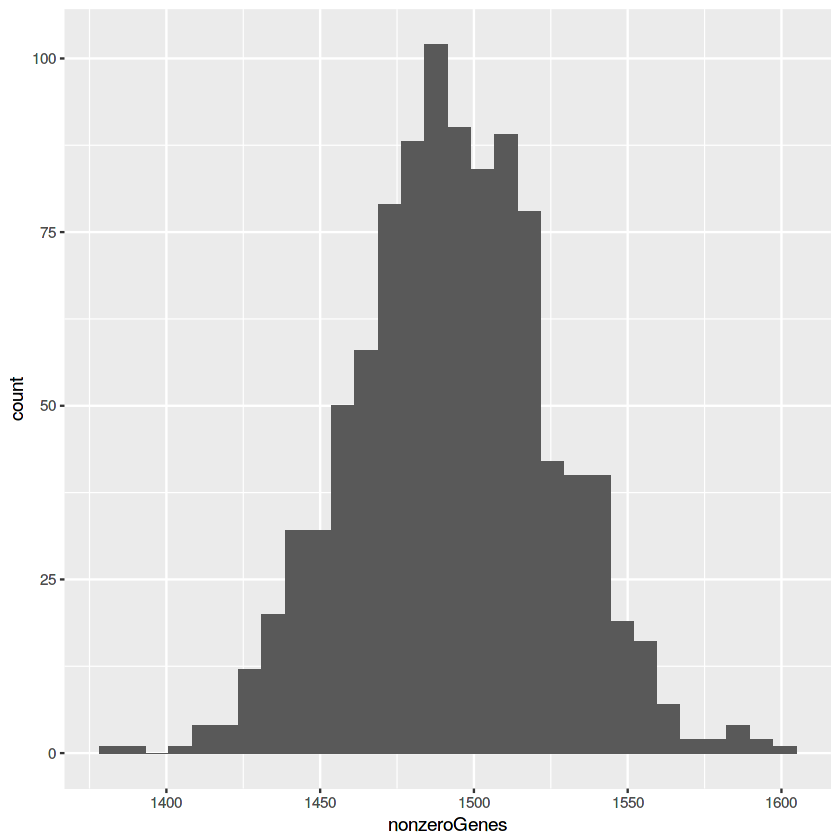

In [13]:
nonzero_gene_count <- as.data.frame(nonzero_gene_count)
colnames(nonzero_gene_count) <- "nonzeroGenes"
ggplot(nonzero_gene_count) + geom_histogram(aes(nonzeroGenes))

### Compare gene list to previous analysis (remove_1s2exp data)

In [14]:
remove_1st2exp_genes <- c('FAM155A_HUMAN','ARHGAP6_HUMAN','ADAMTS12_HUMAN','CCDC141_HUMAN','KCNIP4_HUMAN','SORCS1_HUMAN','ROBO2_HUMAN','GRIN2A_HUMAN','PDE3A_HUMAN','PTCHD4_HUMAN','UACA_HUMAN','CNTN5_HUMAN','GPRIN3_HUMAN','TECRL_HUMAN','PEG10_HUMAN','ANGPT1_HUMAN','CDH11_HUMAN','BMPER_HUMAN','SYT1_HUMAN','FN1_HUMAN','TENM3_HUMAN','GPC3_HUMAN','LDLRAD4_HUMAN','TENM4_HUMAN','RBMS3_HUMAN','AFF3_HUMAN','SPHKAP_HUMAN','MYH7_HUMAN','EGFEM1P_HUMAN','ANXA3_HUMAN','DLEU1_HUMAN','PDGFD_HUMAN','HS6ST3_HUMAN','PPP1R9A_HUMAN','COL11A1_HUMAN','RELN_HUMAN','HMGA2_HUMAN','FRMD5_HUMAN','BCAT1_HUMAN','LDHA_HUMAN','CASC9_HUMAN','MLIP_HUMAN','ANKRD44_HUMAN','NR2F2-AS1_HUMAN','PLCXD3_HUMAN','SMARCA2_HUMAN','PRSS35_HUMAN','PPP1R14C_HUMAN','DOK4_HUMAN','XDH_HUMAN','PRRX1_HUMAN','EEF1A1_HUMAN')
x <- intersect(remove_1st2exp_genes, genes_intersect)
x
length(x)

[1] "FAM155A_HUMAN"   "CCDC141_HUMAN"   "KCNIP4_HUMAN"    "SORCS1_HUMAN"   
 [5] "GRIN2A_HUMAN"    "PTCHD4_HUMAN"    "UACA_HUMAN"      "CNTN5_HUMAN"    
 [9] "GPRIN3_HUMAN"    "PEG10_HUMAN"     "ANGPT1_HUMAN"    "CDH11_HUMAN"    
[13] "SYT1_HUMAN"      "FN1_HUMAN"       "TENM3_HUMAN"     "LDLRAD4_HUMAN"  
[17] "TENM4_HUMAN"     "RBMS3_HUMAN"     "SPHKAP_HUMAN"    "MYH7_HUMAN"     
[21] "EGFEM1P_HUMAN"   "DLEU1_HUMAN"     "PDGFD_HUMAN"     "HS6ST3_HUMAN"   
[25] "COL11A1_HUMAN"   "RELN_HUMAN"      "HMGA2_HUMAN"     "LDHA_HUMAN"     
[29] "CASC9_HUMAN"     "ANKRD44_HUMAN"   "NR2F2-AS1_HUMAN" "PLCXD3_HUMAN"   
[33] "SMARCA2_HUMAN"   "PRSS35_HUMAN"    "XDH_HUMAN"       "PRRX1_HUMAN"

[1] 36

36 genes are detected in both analyses

### Caclulate fold changes for genes

In [15]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [16]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_normalized_counts.RData")

In [17]:
cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_metadata.csv")

In [18]:
head(cell_metadata)

X,nGene,nUMI,orig.ident,day,protocol,cell_line,diff_harvest,passage,scientist,diff_exp,sci_exp,ctnt,cell_sample
AAACATCGAAACATCG_14_6,1577,2986,SeuratProject,D12,Lian,AICS11,08_8_2017,44,KG,7_24_2017,KG_7_24,90,15
AAACATCGAAACATCG_21_10,578,727,SeuratProject,D14,Murry,AICS0,08_11_2017,28,KG,7_27_2017,KG_7_27,78,22
AAACATCGAACAACCA_2_9,489,606,SeuratProject,D12,Lian,AICS37,07_24_2017,34,AN,7_10_2017,AN_7_10,89,3
AAACATCGAACAACCA_5_8,1117,1511,SeuratProject,D14,Murry,AICS0,07_28_2017,32,AN,7_13_2017,AN_7_13,75,6
AAACATCGAACGCTTA_32_8,940,1599,SeuratProject,D24,Lian,AICS11,08_18_2017,44,KG,7_24_2017,KG_7_24,92,33
AAACATCGAACTCACC_26_2,2282,4392,SeuratProject,D12,Lian,AICS37,08_11_2017,37,KG,7_27_2017,KG_7_27,87,27


In [19]:
cardioAICS <- t(cardioAICS)

early_cells <- cell_metadata$day %in% c("D12", "D14")
cardioAICS <- cardioAICS[early_cells,]

diff_day <- cell_metadata$day[early_cells]

names(diff_day) <- cell_metadata$X[early_cells]

cell_metadata <- cell_metadata[early_cells,]

In [20]:
head(cell_metadata)

,X,nGene,nUMI,orig.ident,day,protocol,cell_line,diff_harvest,passage,scientist,diff_exp,sci_exp,ctnt,cell_sample
1,AAACATCGAAACATCG_14_6,1577,2986,SeuratProject,D12,Lian,AICS11,08_8_2017,44,KG,7_24_2017,KG_7_24,90,15
2,AAACATCGAAACATCG_21_10,578,727,SeuratProject,D14,Murry,AICS0,08_11_2017,28,KG,7_27_2017,KG_7_27,78,22
3,AAACATCGAACAACCA_2_9,489,606,SeuratProject,D12,Lian,AICS37,07_24_2017,34,AN,7_10_2017,AN_7_10,89,3
4,AAACATCGAACAACCA_5_8,1117,1511,SeuratProject,D14,Murry,AICS0,07_28_2017,32,AN,7_13_2017,AN_7_13,75,6
6,AAACATCGAACTCACC_26_2,2282,4392,SeuratProject,D12,Lian,AICS37,08_11_2017,37,KG,7_27_2017,KG_7_27,87,27
7,AAACATCGAACTCACC_26_3,2279,3624,SeuratProject,D12,Lian,AICS37,08_11_2017,37,KG,7_27_2017,KG_7_27,87,27


In [21]:
genes.use <- genes_intersect

cytokine_cells <- cell_metadata$X[cell_metadata$protocol == "Murry"]
small_mol_cells <- cell_metadata$X[cell_metadata$protocol == "Lian"]

cytokine_exp_mat <- cardioAICS[cytokine_cells,]
small_mol_exp_mat <- cardioAICS[small_mol_cells,]

foldChange_list <- list()
for (i in 1:length(genes.use)) {
    gene <- genes.use[i]
    cytokine_exp <- cytokine_exp_mat[,gene]
    small_mol_exp <- small_mol_exp_mat[,gene]
    log2fc <- log2(mean(expm1(small_mol_exp)) + 1) - log2(mean(expm1(cytokine_exp)) + 1)
    foldChange_list[[gene]] <- log2fc
    
}

lfc_df <- data.frame("log2fc" = as.numeric(foldChange_list), "gene" = names(foldChange_list), row.names = names(foldChange_list))
lfc_df <- dplyr::arrange(lfc_df, log2fc)

In [22]:
lfc_df

log2fc,gene
-3.6607493,CNTN5_HUMAN
-1.5836942,SPHKAP_HUMAN
-1.0904951,GRIA4_HUMAN
-1.0326458,PDGFD_HUMAN
-1.0264053,EGFEM1P_HUMAN
-0.9273187,SORCS1_HUMAN
-0.9261419,L3MBTL4_HUMAN
-0.8601971,LRP1B_HUMAN
-0.8264670,PLCXD3_HUMAN
-0.7807262,SYNPO2_HUMAN


### Fit using 61 genes

In [23]:
diff_day <- as.factor(diff_day)

In [24]:
head(diff_day)

AAACATCGAAACATCG_14_6 AAACATCGAAACATCG_21_10   AAACATCGAACAACCA_2_9 
                   D12                    D14                    D12 
  AAACATCGAACAACCA_5_8  AAACATCGAACTCACC_26_2  AAACATCGAACTCACC_26_3 
                   D14                    D12                    D12 
Levels: D12 D14

In [25]:
levels(diff_day)

[1] "D12" "D14"

In [26]:
library(boot)

In [27]:
subset_cardio <- cardioAICS[,genes.use]
subset_cardio <- as.data.frame(as.matrix(subset_cardio))

In [28]:
head(subset_cardio)

,TTN_HUMAN,NLGN1_HUMAN,FAM155A_HUMAN,CCDC141_HUMAN,KCNIP4_HUMAN,SORCS1_HUMAN,HS3ST4_HUMAN,GRIN2A_HUMAN,PTCHD4_HUMAN,UACA_HUMAN,⋯,SMARCA2_HUMAN,CKM_HUMAN,GRIA4_HUMAN,PRSS35_HUMAN,SLC44A5_HUMAN,NLGN4X_HUMAN,XDH_HUMAN,PRRX1_HUMAN,PDZD2_HUMAN,RNU4-2_HUMAN
AAACATCGAAACATCG_14_6,6.774314,1.469937,0.000000,2.402149,0.000000,0.000000,0.000000,1.469937,0.000000,2.040951,⋯,1.469937,0.000000,0,2.040951,0,0.000000,0,0,0,0
AAACATCGAAACATCG_21_10,5.882303,0.000000,0.000000,0.000000,2.691593,2.691593,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0,0.000000,0,0.000000,0,0,0,0
AAACATCGAACAACCA_2_9,5.941586,0.000000,0.000000,0.000000,2.862295,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,2.862295,0,0.000000,0,0.000000,0,0,0,0
AAACATCGAACAACCA_5_8,5.986673,0.000000,2.030531,2.030531,0.000000,0.000000,0.000000,0.000000,0.000000,2.030531,⋯,0.000000,0.000000,0,0.000000,0,0.000000,0,0,0,0
AAACATCGAACTCACC_26_2,6.092920,2.955688,0.000000,2.829564,4.170569,1.186888,0.000000,2.058039,0.000000,1.186888,⋯,0.000000,0.000000,0,0.000000,0,0.000000,0,0,0,0
AAACATCGAACTCACC_26_3,1.324255,0.000000,1.874685,0.000000,0.000000,0.000000,2.488029,0.000000,1.324255,1.324255,⋯,0.000000,0.000000,0,0.000000,0,1.874685,0,0,0,0


In [29]:
dim(subset_cardio)

[1] 9800   61

In [30]:
fit <- glm(diff_day ~ .,
    data = subset_cardio, family = binomial("logit")
   )

In [31]:
fit


Call:  glm(formula = diff_day ~ ., family = binomial("logit"), data = subset_cardio)

Coefficients:
      (Intercept)          TTN_HUMAN        NLGN1_HUMAN      FAM155A_HUMAN  
          -0.8076             0.2891            -0.2513             0.3264  
    CCDC141_HUMAN       KCNIP4_HUMAN       SORCS1_HUMAN       HS3ST4_HUMAN  
          -0.3070            -0.3485             0.3650             0.4141  
     GRIN2A_HUMAN       PTCHD4_HUMAN         UACA_HUMAN         PRTG_HUMAN  
          -0.5001            -0.4390             0.2161            -0.3682  
      CNTN5_HUMAN       GPRIN3_HUMAN        PEG10_HUMAN       ANGPT1_HUMAN  
           0.7278             0.2183             0.2543            -0.3091  
      CDH11_HUMAN         SYT1_HUMAN          FN1_HUMAN        TENM3_HUMAN  
           0.2444            -0.4933            -0.1843            -0.3898  
    PLEKHA5_HUMAN      LDLRAD4_HUMAN        TENM4_HUMAN        RBMS3_HUMAN  
          -0.2504             0.3168            -0.2

In [32]:
subset_cardio$diff_day <- diff_day

In [33]:
cost <- function(r, pi = 0) mean(abs(r-pi) > 0.5)
cv.test <- cv.glm(subset_cardio, cost = cost, fit, K = 5)

In [34]:
cv.test$delta

[1] 0.08989796 0.08887755

In [35]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_normalized_counts.RData")
holdout_cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_metadata.csv")

In [36]:
holdout_cardioAICS <- t(holdout_cardioAICS)
holdout_early_cells <- holdout_cell_metadata$day %in% c("D12", "D14")
holdout_cardioAICS <- holdout_cardioAICS[holdout_early_cells,]

diff_day <- holdout_cell_metadata$day[holdout_early_cells]

names(diff_day) <- holdout_cell_metadata$X[holdout_early_cells]

holdout_cell_metadata <- holdout_cell_metadata[holdout_early_cells,]

In [37]:
holdout_cardioAICS

   [[ suppressing 32 column names ‘TTN_HUMAN’, ‘AATF_HUMAN’, ‘NEXN_HUMAN’ ... ]]


1103 x 22187 sparse Matrix of class "dgCMatrix"
                                                                       
AAACATCGAACAACCA_25_11 5.4400144 .         2.3570950 .         5.628508
AAACATCGACACGACC_12_9  5.3094472 .         .         .         6.525198
AAACATCGCAATGGAA_16_6  6.3143385 .         .         .         5.388132
AAACATCGCAGATCTG_8_8   5.7559915 .         .         .         5.707359
AAACATCGCCGACAAC_4_3   5.5698285 .         3.1529403 .         5.347637
AAACATCGCGGATTGC_26_11 .         .         .         .         5.590320
AAACATCGCTGGCATA_24_10 5.6505459 2.5126733 3.1644508 2.5126733 6.119230
AAACATCGGCTAACGA_22_4  .         .         .         .         6.093610
AACAACCAACACGACC_22_7  5.6002852 .         1.8981832 1.3446594 5.351522
AACAACCAATGCCTAA_3_9   6.1452887 .         2.2572998 1.4867954 5.416988
AACAACCAATTGAGGA_5_4   4.6678605 .         1.2391808 1.2391808 5.862915
AACAACCACAGATCTG_13_8  2.0021260 .         0.7263226 .         5.373240
AACAACCACCTAATCC

In [38]:
holdout_mat <- holdout_cardioAICS[,genes.use]
holdout_mat <- as.data.frame(as.matrix(holdout_mat))

In [39]:
holdout_mat

,TTN_HUMAN,NLGN1_HUMAN,FAM155A_HUMAN,CCDC141_HUMAN,KCNIP4_HUMAN,SORCS1_HUMAN,HS3ST4_HUMAN,GRIN2A_HUMAN,PTCHD4_HUMAN,UACA_HUMAN,⋯,SMARCA2_HUMAN,CKM_HUMAN,GRIA4_HUMAN,PRSS35_HUMAN,SLC44A5_HUMAN,NLGN4X_HUMAN,XDH_HUMAN,PRRX1_HUMAN,PDZD2_HUMAN,RNU4-2_HUMAN
AAACATCGAACAACCA_25_11,5.440014,0.000000,2.3570950,3.001737,4.350044,2.3570950,0.0000000,3.0017372,0.0000000,3.0017372,⋯,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000
AAACATCGACACGACC_12_9,5.309447,0.000000,0.0000000,2.802140,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,2.8021400,⋯,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000
AAACATCGCAATGGAA_16_6,6.314339,2.701479,0.0000000,2.329017,1.728806,1.7288055,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,1.7288055,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000
AAACATCGCAGATCTG_8_8,5.755991,0.000000,0.0000000,0.000000,2.772823,0.0000000,0.0000000,0.0000000,0.0000000,2.1402868,⋯,2.1402868,0.0000000,0.000000,0.0000000,0.000000,2.1402868,0.000000,0.000000,0.0000000,0.0000000
AAACATCGCCGACAAC_4_3,5.569829,2.136325,0.0000000,3.152940,3.152940,0.0000000,0.0000000,0.0000000,0.0000000,2.7686133,⋯,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000
AAACATCGCGGATTGC_26_11,0.000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000
AAACATCGCTGGCATA_24_10,5.650546,0.000000,0.0000000,2.512673,3.836253,0.0000000,0.0000000,0.0000000,0.0000000,3.8362531,⋯,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000
AAACATCGGCTAACGA_22_4,0.000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,1.8245828,0.0000000,2.8094403,0.0000000,⋯,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000
AACAACCAACACGACC_22_7,5.600285,0.000000,0.0000000,2.252411,3.165266,0.0000000,0.0000000,0.0000000,0.0000000,2.2524110,⋯,0.0000000,1.3446594,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000
AACAACCAATGCCTAA_3_9,6.145289,2.059978,2.4220288,2.563421,2.059978,0.0000000,0.0000000,0.9974834,0.0000000,0.9974834,⋯,0.0000000,0.9974834,0.000000,0.0000000,0.000000,0.9974834,0.000000,0.000000,0.9974834,0.0000000


In [40]:
dim(holdout_mat)

[1] 1103   61

In [41]:
holdout_predict <- predict(fit, newdata = holdout_mat, type = c("response"))

In [42]:
holdout_predict

AAACATCGAACAACCA_25_11  AAACATCGACACGACC_12_9  AAACATCGCAATGGAA_16_6 
          9.444463e-01           9.713973e-01           3.869575e-01 
  AAACATCGCAGATCTG_8_8   AAACATCGCCGACAAC_4_3 AAACATCGCGGATTGC_26_11 
          3.488424e-02           8.299799e-01           3.340794e-01 
AAACATCGCTGGCATA_24_10  AAACATCGGCTAACGA_22_4  AACAACCAACACGACC_22_7 
          1.810378e-01           1.502247e-02           1.562690e-01 
  AACAACCAATGCCTAA_3_9   AACAACCAATTGAGGA_5_4  AACAACCACAGATCTG_13_8 
          9.881156e-01           9.527813e-01           4.283947e-01 
  AACAACCACCTAATCC_1_3  AACAACCACTGTAGCC_11_7   AACAACCAGAGTTAGC_6_4 
          9.415884e-01           1.128908e-01           2.469088e-04 
AACCGAGAAAACATCG_11_10   AACCGAGAAACGCTTA_6_7  AACCGAGAAGAGTCAA_25_3 
          9.997104e-01           9.953786e-01           9.791569e-01 
 AACCGAGAAGTACAAG_15_4   AACCGAGAATAGCGAC_0_7  AACCGAGAATCATTCC_0_11 
          7.141427e-01           2.815190e-02           6.533598e-02 
 AACCGAGAATCCTGTA_23_6   AACCGAGAATCCTGTA_5_6   AACCGAGACAAGACTA_6_2 
          9.989101e-01           9.636656e-01           3.933935e-02 
  AACCGAGACCATCCTC_0_2  AACCGAGACTGTAGCC_17_8   AACCGAGAGCTAACGA_7_5 
          8.368470e-04           8.668549e-01           9.916110e-01 
AACGCTTAACCTCCAA_27_11   AACGCTTAAGATCGCA_0_1   AACGCTTAAGATGTAC_4_2 
          9.480760e-01           4.502708e-03           9.587358e-03 
  AACGCTTAATCCTGTA_4_6  AACGCTTACAGATCTG_19_6  AACGCTTACATACCAA_25_8 
          3.279561e-01           9.949372e-01           9.938403e-01 
 AACGCTTACGCTGATC_18_5   AACGCTTACTAAGGTC_9_7  AACGCTTACTCAATGA_22_1 
          4.811213e-03           7.534245e-01           2.261471e-03 
  AACGCTTACTGAGCCA_6_2  AACGCTTAGATGAATC_14_1  AACGCTTAGTACGCAA_11_9 
          9.944804e-02           6.769085e-01           8.824802e-01 
AACGTGATACAGCAGA_19_11  AACGTGATATCCTGTA_8_10  AACGTGATCAAGACTA_19_5 
          7.753087e-01           2.419198e-01           9.100578e-01 
  AACGTGATCACCTTAC_7_1   AACGTGATCAGATCTG_2_5  AACGTGATCCGAAGTA_16_2 
          9.999579e-01           7.354128e-02           4.495364e-02 
 AACGTGATCCTAATCC_27_8  AACGTGATCGACACAC_16_8 AACGTGATCGACTGGA_17_12 
          9.995792e-01           1.837772e-02           7.639302e-01 
 AACGTGATGACAGTGC_13_8  AACGTGATGCCACATA_16_1   AACGTGATTGGCTTCA_8_8 
          9.986390e-01           9.179730e-01           2.758536e-02 
 AACTCACCAAGAGATC_27_9  AACTCACCAGCACCTC_17_6  AACTCACCAGTGGTCA_17_9 
          9.993488e-01           9.969098e-01           9.993330e-01 
 AACTCACCCGACTGGA_13_7  AACTCACCCTGAGCCA_19_7  AACTCACCGCTAACGA_21_2 
          9.996425e-01           9.288337e-01           9.874673e-01 
  AACTCACCTAGGATGA_6_1  AACTCACCTCCGTCTA_12_4  AAGACGGAAACAACCA_16_8 
          4.508341e-02           3.472790e-02           6.231640e-02 
 AAGACGGAAACGTGAT_25_9  AAGACGGAAAGAGATC_13_3  AAGACGGAACAAGCTA_26_3 
          9.987430e-01           8.492112e-01           2.120679e-02 
  AAGACGGAACAGATTC_7_9  AAGACGGAACGCTCGA_27_1  AAGACGGAATGCCTAA_13_5 
          9.983101e-01           9.976199e-01           9.430977e-01 
  AAGACGGACCGACAAC_9_8  AAGACGGACCTCTATC_21_8  AAGACGGACTCAATGA_12_4 
          9.905593e-01           9.787029e-01           2.115632e-01 
AAGACGGAGAGCTGAA_13_11   AAGACGGAGCGAGTAA_5_5  AAGACGGAGCTCGGTA_19_7 
          4.939336e-01           7.666268e-01           9.997623e-01 
 AAGACGGAGTCGTAGA_23_7   AAGACGGAGTCTGTCA_2_5   AAGAGATCACAGCAGA_7_5 
          9.997260e-01           3.168694e-05           9.998388e-01 
  AAGAGATCAGGCTAAC_7_4  AAGAGATCATAGCGAC_23_5 AAGAGATCCACTTCGA_26_11 
          9.673640e-01           8.077746e-01           5.210650e-03 
AAGAGATCCTGGCATA_18_10 AAGGACACAAGGTACA_17_11  AAGGACACACCTCCAA_26_4 
          1.176446e-02           6.840100e-01           6.333443e-03 
  AAGGACACCATACCAA_6_8   AAGGACACGCTAACGA_1_9 AAGGACACGTGTTCTA_27_10 
          1.735199e-03           4.696156e-01           9.952838e-01 
 AAGGACACTGGTGGTA_17_4  AAGGTACAACACAGAA_17_1   AAGGTACAACAGATTC_1_1 
          

In [43]:
diff_day

AAACATCGAACAACCA_25_11  AAACATCGACACGACC_12_9  AAACATCGCAATGGAA_16_6 
                 "D14"                  "D12"                  "D12" 
  AAACATCGCAGATCTG_8_8   AAACATCGCCGACAAC_4_3 AAACATCGCGGATTGC_26_11 
                 "D12"                  "D12"                  "D12" 
AAACATCGCTGGCATA_24_10  AAACATCGGCTAACGA_22_4  AACAACCAACACGACC_22_7 
                 "D12"                  "D12"                  "D12" 
  AACAACCAATGCCTAA_3_9   AACAACCAATTGAGGA_5_4  AACAACCACAGATCTG_13_8 
                 "D14"                  "D14"                  "D14" 
  AACAACCACCTAATCC_1_3  AACAACCACTGTAGCC_11_7   AACAACCAGAGTTAGC_6_4 
                 "D14"                  "D14"                  "D12" 
AACCGAGAAAACATCG_11_10   AACCGAGAAACGCTTA_6_7  AACCGAGAAGAGTCAA_25_3 
                 "D14"                  "D12"                  "D14" 
 AACCGAGAAGTACAAG_15_4   AACCGAGAATAGCGAC_0_7  AACCGAGAATCATTCC_0_11 
                 "D14"                  "D12"                  "D12" 
 AACCGAGAATCCTGTA_23_6   AACCGAGAATCCTGTA_5_6   AACCGAGACAAGACTA_6_2 
                 "D14"                  "D14"                  "D12" 
  AACCGAGACCATCCTC_0_2  AACCGAGACTGTAGCC_17_8   AACCGAGAGCTAACGA_7_5 
                 "D12"                  "D14"                  "D14" 
AACGCTTAACCTCCAA_27_11   AACGCTTAAGATCGCA_0_1   AACGCTTAAGATGTAC_4_2 
                 "D14"                  "D12"                  "D12" 
  AACGCTTAATCCTGTA_4_6  AACGCTTACAGATCTG_19_6  AACGCTTACATACCAA_25_8 
                 "D12"                  "D14"                  "D14" 
 AACGCTTACGCTGATC_18_5   AACGCTTACTAAGGTC_9_7  AACGCTTACTCAATGA_22_1 
                 "D12"                  "D14"                  "D12" 
  AACGCTTACTGAGCCA_6_2  AACGCTTAGATGAATC_14_1  AACGCTTAGTACGCAA_11_9 
                 "D12"                  "D12"                  "D14" 
AACGTGATACAGCAGA_19_11  AACGTGATATCCTGTA_8_10  AACGTGATCAAGACTA_19_5 
                 "D14"                  "D12"                  "D14" 
  AACGTGATCACCTTAC_7_1   AACGTGATCAGATCTG_2_5  AACGTGATCCGAAGTA_16_2 
                 "D14"                  "D12"                  "D12" 
 AACGTGATCCTAATCC_27_8  AACGTGATCGACACAC_16_8 AACGTGATCGACTGGA_17_12 
                 "D14"                  "D12"                  "D14" 
 AACGTGATGACAGTGC_13_8  AACGTGATGCCACATA_16_1   AACGTGATTGGCTTCA_8_8 
                 "D14"                  "D12"                  "D12" 
 AACTCACCAAGAGATC_27_9  AACTCACCAGCACCTC_17_6  AACTCACCAGTGGTCA_17_9 
                 "D14"                  "D14"                  "D14" 
 AACTCACCCGACTGGA_13_7  AACTCACCCTGAGCCA_19_7  AACTCACCGCTAACGA_21_2 
                 "D14"                  "D14"                  "D14" 
  AACTCACCTAGGATGA_6_1  AACTCACCTCCGTCTA_12_4  AAGACGGAAACAACCA_16_8 
                 "D12"                  "D12"                  "D12" 
 AAGACGGAAACGTGAT_25_9  AAGACGGAAAGAGATC_13_3  AAGACGGAACAAGCTA_26_3 
                 "D14"                  "D14"                  "D12" 
  AAGACGGAACAGATTC_7_9  AAGACGGAACGCTCGA_27_1  AAGACGGAATGCCTAA_13_5 
                 "D14"                  "D14"                  "D14" 
  AAGACGGACCGACAAC_9_8  AAGACGGACCTCTATC_21_8  AAGACGGACTCAATGA_12_4 
                 "D14"                  "D14"                  "D12" 
AAGACGGAGAGCTGAA_13_11   AAGACGGAGCGAGTAA_5_5  AAGACGGAGCTCGGTA_19_7 
                 "D14"                  "D14"                  "D14" 
 AAGACGGAGTCGTAGA_23_7   AAGACGGAGTCTGTCA_2_5   AAGAGATCACAGCAGA_7_5 
                 "D14"                  "D12"                  "D14" 
  AAGAGATCAGGCTAAC_7_4  AAGAGATCATAGCGAC_23_5 AAGAGATCCACTTCGA_26_11 
                 "D14"                  "D14"                  "D12" 
AAGAGATCCTGGCATA_18_10 AAGGACACAAGGTACA_17_11  AAGGACACACCTCCAA_26_4 
                 "D12"                  "D14"                  "D12" 
  AAGGACACCATACCAA_6_8   AAGGACACGCTAACGA_1_9 AAGGACACGTGTTCTA_27_10 
                 "D12"                  "D14"                  "D14" 
 AAGGACACTGGTGGTA_17_4  AAGGTACAACACAGAA_17_1   AAGGTACAACAGATTC_1_1 
          

In [44]:
get_predicted_time <- function(predict_prob) {
    if (predict_prob < 0.5) {
        return("D12")
    } else {
        return("D14")
    }
}

In [45]:
predicted_day <- sapply(holdout_predict, get_predicted_time, simplify = TRUE)

In [46]:
predicted_day

AAACATCGAACAACCA_25_11  AAACATCGACACGACC_12_9  AAACATCGCAATGGAA_16_6 
                 "D14"                  "D14"                  "D12" 
  AAACATCGCAGATCTG_8_8   AAACATCGCCGACAAC_4_3 AAACATCGCGGATTGC_26_11 
                 "D12"                  "D14"                  "D12" 
AAACATCGCTGGCATA_24_10  AAACATCGGCTAACGA_22_4  AACAACCAACACGACC_22_7 
                 "D12"                  "D12"                  "D12" 
  AACAACCAATGCCTAA_3_9   AACAACCAATTGAGGA_5_4  AACAACCACAGATCTG_13_8 
                 "D14"                  "D14"                  "D12" 
  AACAACCACCTAATCC_1_3  AACAACCACTGTAGCC_11_7   AACAACCAGAGTTAGC_6_4 
                 "D14"                  "D12"                  "D12" 
AACCGAGAAAACATCG_11_10   AACCGAGAAACGCTTA_6_7  AACCGAGAAGAGTCAA_25_3 
                 "D14"                  "D14"                  "D14" 
 AACCGAGAAGTACAAG_15_4   AACCGAGAATAGCGAC_0_7  AACCGAGAATCATTCC_0_11 
                 "D14"                  "D12"                  "D12" 
 AACCGAGAATCCTGTA_23_6   AACCGAGAATCCTGTA_5_6   AACCGAGACAAGACTA_6_2 
                 "D14"                  "D14"                  "D12" 
  AACCGAGACCATCCTC_0_2  AACCGAGACTGTAGCC_17_8   AACCGAGAGCTAACGA_7_5 
                 "D12"                  "D14"                  "D14" 
AACGCTTAACCTCCAA_27_11   AACGCTTAAGATCGCA_0_1   AACGCTTAAGATGTAC_4_2 
                 "D14"                  "D12"                  "D12" 
  AACGCTTAATCCTGTA_4_6  AACGCTTACAGATCTG_19_6  AACGCTTACATACCAA_25_8 
                 "D12"                  "D14"                  "D14" 
 AACGCTTACGCTGATC_18_5   AACGCTTACTAAGGTC_9_7  AACGCTTACTCAATGA_22_1 
                 "D12"                  "D14"                  "D12" 
  AACGCTTACTGAGCCA_6_2  AACGCTTAGATGAATC_14_1  AACGCTTAGTACGCAA_11_9 
                 "D12"                  "D14"                  "D14" 
AACGTGATACAGCAGA_19_11  AACGTGATATCCTGTA_8_10  AACGTGATCAAGACTA_19_5 
                 "D14"                  "D12"                  "D14" 
  AACGTGATCACCTTAC_7_1   AACGTGATCAGATCTG_2_5  AACGTGATCCGAAGTA_16_2 
                 "D14"                  "D12"                  "D12" 
 AACGTGATCCTAATCC_27_8  AACGTGATCGACACAC_16_8 AACGTGATCGACTGGA_17_12 
                 "D14"                  "D12"                  "D14" 
 AACGTGATGACAGTGC_13_8  AACGTGATGCCACATA_16_1   AACGTGATTGGCTTCA_8_8 
                 "D14"                  "D14"                  "D12" 
 AACTCACCAAGAGATC_27_9  AACTCACCAGCACCTC_17_6  AACTCACCAGTGGTCA_17_9 
                 "D14"                  "D14"                  "D14" 
 AACTCACCCGACTGGA_13_7  AACTCACCCTGAGCCA_19_7  AACTCACCGCTAACGA_21_2 
                 "D14"                  "D14"                  "D14" 
  AACTCACCTAGGATGA_6_1  AACTCACCTCCGTCTA_12_4  AAGACGGAAACAACCA_16_8 
                 "D12"                  "D12"                  "D12" 
 AAGACGGAAACGTGAT_25_9  AAGACGGAAAGAGATC_13_3  AAGACGGAACAAGCTA_26_3 
                 "D14"                  "D14"                  "D12" 
  AAGACGGAACAGATTC_7_9  AAGACGGAACGCTCGA_27_1  AAGACGGAATGCCTAA_13_5 
                 "D14"                  "D14"                  "D14" 
  AAGACGGACCGACAAC_9_8  AAGACGGACCTCTATC_21_8  AAGACGGACTCAATGA_12_4 
                 "D14"                  "D14"                  "D12" 
AAGACGGAGAGCTGAA_13_11   AAGACGGAGCGAGTAA_5_5  AAGACGGAGCTCGGTA_19_7 
                 "D12"                  "D14"                  "D14" 
 AAGACGGAGTCGTAGA_23_7   AAGACGGAGTCTGTCA_2_5   AAGAGATCACAGCAGA_7_5 
                 "D14"                  "D12"                  "D14" 
  AAGAGATCAGGCTAAC_7_4  AAGAGATCATAGCGAC_23_5 AAGAGATCCACTTCGA_26_11 
                 "D14"                  "D14"                  "D12" 
AAGAGATCCTGGCATA_18_10 AAGGACACAAGGTACA_17_11  AAGGACACACCTCCAA_26_4 
                 "D12"                  "D14"                  "D12" 
  AAGGACACCATACCAA_6_8   AAGGACACGCTAACGA_1_9 AAGGACACGTGTTCTA_27_10 
                 "D12"                  "D12"                  "D14" 
 AAGGACACTGGTGGTA_17_4  AAGGTACAACACAGAA_17_1   AAGGTACAACAGATTC_1_1 
          

In [47]:
predict_actual_df <- data.frame("predicted" = predicted_day, "actual" = diff_day)
xtabs(~ predicted + actual, data = predict_actual_df)

         actual
predicted D12 D14
      D12 496  51
      D14  54 502